In [1]:
!pip install missingno
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
import datetime
import seaborn as sns
import missingno as msno
sns.set_theme(style="whitegrid")
%matplotlib inline 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [52]:
cuaca = pd.read_json("https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/auto_weather_stat/id-03/data.json")
geomagnetik = pd.read_json("https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/geomagnetic_stat/id-01/data.json")

In [53]:
cuacaT=cuaca.transpose()
cuacaT.tail(10)

dew  humidity  pressure  temperature     timestamp  volt
1729900969  25.14     96.90   1013.59        25.67  1.729901e+09  4.11
1729901029  25.17     96.86   1013.61        25.71  1.729901e+09  4.12
1729901089  25.13     96.73   1013.63        25.69  1.729901e+09  4.09
1729901149  24.87     95.80   1013.62        25.59  1.729901e+09  4.13
1729901209  24.86     95.59   1013.65        25.62  1.729901e+09  4.12
1729901269  24.90     95.61   1013.69        25.65  1.729901e+09  4.12
1729901329  24.94     95.64   1013.77        25.69  1.729901e+09  4.12
1729901389  24.96     95.59   1013.76        25.72  1.729901e+09  4.12
1729901449  24.98     95.48   1013.76        25.76  1.729901e+09  4.12
1729901509  24.95     95.11   1013.81        25.79  1.729902e+09  4.13

In [54]:
cuacaT.describe()

dew       humidity       pressure    temperature  \
count  446419.000000  446420.000000  446420.000000  446420.000000   
mean       25.026395      85.575411    1008.934141      27.854386   
std         1.492574      11.099581      50.860681       3.260140   
min        17.670000       0.000000      -9.050000       0.020000   
25%        24.170000      76.730000    1010.230000      25.440000   
50%        25.120000      89.920000    1011.530000      26.990000   
75%        26.050000      94.650000    1012.790000      30.340000   
max        29.700000      99.580000    1016.530000      41.120000   

          timestamp          volt  
count  4.464200e+05  446420.00000  
mean   1.716171e+09       4.09072  
std    8.364333e+06       0.03108  
min    0.000000e+00       0.00000  
25%    1.709193e+09       4.07000  
50%    1.716256e+09       4.09000  
75%    1.723051e+09       4.12000  
max    1.729902e+09       4.17000

In [55]:
cuacaT['timestamp']= cuacaT['timestamp'].astype(int)
cuacaT.tail(10)

dew  humidity  pressure  temperature   timestamp  volt
1729900969  25.14     96.90   1013.59        25.67  1729900969  4.11
1729901029  25.17     96.86   1013.61        25.71  1729901029  4.12
1729901089  25.13     96.73   1013.63        25.69  1729901089  4.09
1729901149  24.87     95.80   1013.62        25.59  1729901149  4.13
1729901209  24.86     95.59   1013.65        25.62  1729901209  4.12
1729901269  24.90     95.61   1013.69        25.65  1729901269  4.12
1729901329  24.94     95.64   1013.77        25.69  1729901329  4.12
1729901389  24.96     95.59   1013.76        25.72  1729901389  4.12
1729901449  24.98     95.48   1013.76        25.76  1729901449  4.12
1729901509  24.95     95.11   1013.81        25.79  1729901509  4.13

In [56]:
# Menampilkan 10 data terakhir
cuacaT.head(10)

dew  humidity  pressure  temperature   timestamp  volt
0           22.62     89.33   1011.29        24.49           0  4.06
1702296831  23.29     89.28   1010.72        25.18  1702296831  4.08
1702296891  23.29     89.38   1010.75        25.16  1702296891  4.08
1702296951  23.31     89.58   1010.76        25.14  1702296951  4.08
1702297011  23.35     89.86   1010.82        25.13  1702297011  4.08
1702297071  23.32     89.85   1010.82        25.10  1702297071  4.08
1702297131  23.29     89.81   1010.85        25.08  1702297131  4.08
1702297190  23.27     89.87   1010.84        25.05  1702297190  4.08
1702297251  23.26     89.88   1010.88        25.04  1702297251  4.09
1702297311  23.26     90.00   1010.86        25.02  1702297311  4.08

In [57]:
cuacaT.tail(10)

dew  humidity  pressure  temperature   timestamp  volt
1729900969  25.14     96.90   1013.59        25.67  1729900969  4.11
1729901029  25.17     96.86   1013.61        25.71  1729901029  4.12
1729901089  25.13     96.73   1013.63        25.69  1729901089  4.09
1729901149  24.87     95.80   1013.62        25.59  1729901149  4.13
1729901209  24.86     95.59   1013.65        25.62  1729901209  4.12
1729901269  24.90     95.61   1013.69        25.65  1729901269  4.12
1729901329  24.94     95.64   1013.77        25.69  1729901329  4.12
1729901389  24.96     95.59   1013.76        25.72  1729901389  4.12
1729901449  24.98     95.48   1013.76        25.76  1729901449  4.12
1729901509  24.95     95.11   1013.81        25.79  1729901509  4.13

In [58]:
# Tentukan batas bawah dan batas atas waktu yang wajar dalam format UNIX
start_timestamp = pd.Timestamp('2020-01-01').timestamp()  # UNIX time untuk 1 Januari 2020
end_timestamp = pd.Timestamp.now().timestamp()  # UNIX time saat ini

# Hapus data dengan timestamp di luar rentang waktu yang wajar
cuacaT = cuacaT[(cuacaT['timestamp'] >= start_timestamp) & (cuacaT['timestamp'] <= end_timestamp)]

In [59]:
# Konversi timestamp ke datetime dalam format UTC
cuacaT['timestamp'] = pd.to_datetime(cuacaT['timestamp'], unit='s', utc=True)

# Mengonversi ke zona waktu WIB (Asia/Jakarta)
cuacaT['timestamp'] = cuacaT['timestamp'].dt.tz_convert('Asia/Jakarta')

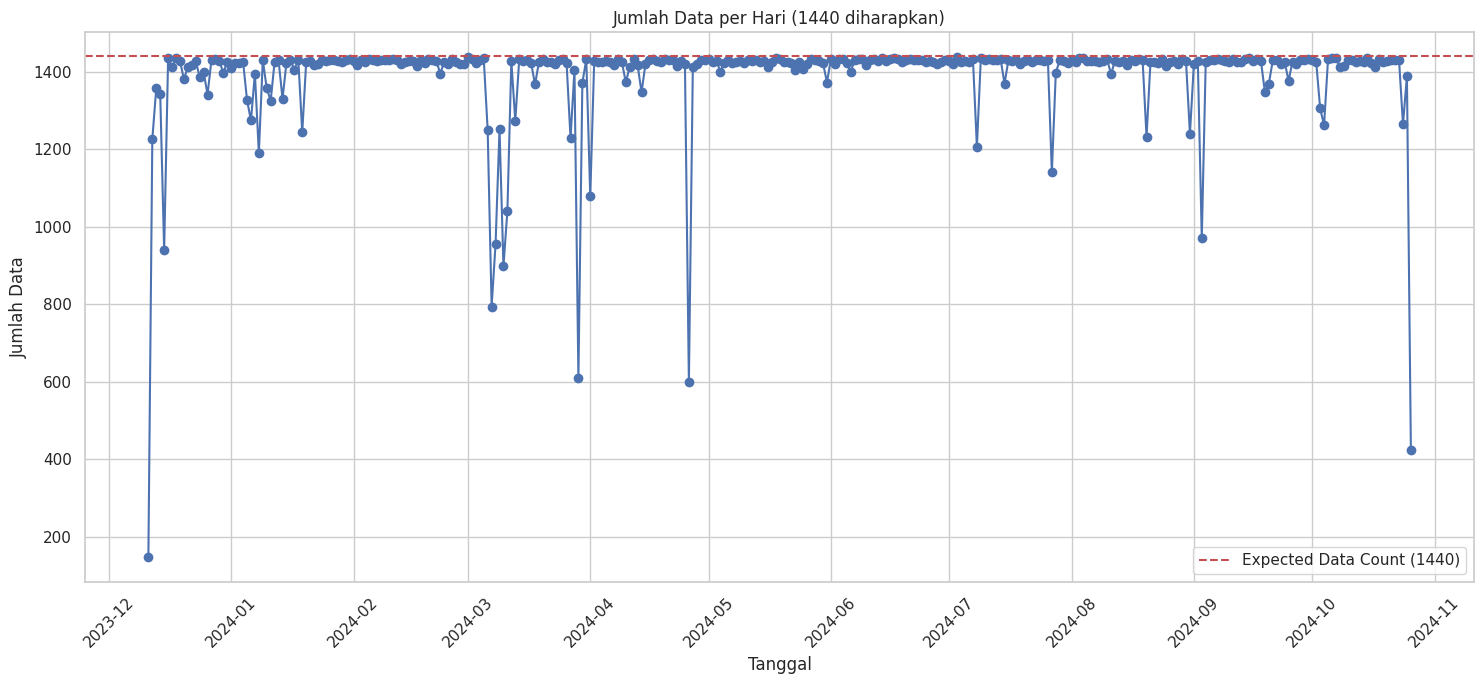

Hari dengan jumlah data yang kurang dari 1440:
           date  count
0    2023-12-11    148
1    2023-12-12   1226
2    2023-12-13   1357
3    2023-12-14   1343
4    2023-12-15    939
..          ...    ...
316  2024-10-22   1429
317  2024-10-23   1430
318  2024-10-24   1264
319  2024-10-25   1388
320  2024-10-26    425

[321 rows x 2 columns]


In [60]:

# Mengelompokkan data berdasarkan hari
cuacaT['date'] = cuacaT['timestamp'].dt.date
data_per_day = cuacaT.groupby('date').size().reset_index(name='count')

# Visualisasi jumlah data per hari
plt.figure(figsize=(15, 7))
plt.plot(data_per_day['date'], data_per_day['count'], marker='o', linestyle='-')
plt.axhline(y=1440, color='r', linestyle='--', label='Expected Data Count (1440)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data per Hari (1440 diharapkan)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Menampilkan hari-hari yang tidak memenuhi 1440 data
days_with_missing_data = data_per_day[data_per_day['count'] != 1440]
print("Hari dengan jumlah data yang kurang dari 1440:")
print(days_with_missing_data)

In [61]:
cuacaT.tail(10)

dew  humidity  pressure  temperature                 timestamp  \
1729900969  25.14     96.90   1013.59        25.67 2024-10-26 07:02:49+07:00   
1729901029  25.17     96.86   1013.61        25.71 2024-10-26 07:03:49+07:00   
1729901089  25.13     96.73   1013.63        25.69 2024-10-26 07:04:49+07:00   
1729901149  24.87     95.80   1013.62        25.59 2024-10-26 07:05:49+07:00   
1729901209  24.86     95.59   1013.65        25.62 2024-10-26 07:06:49+07:00   
1729901269  24.90     95.61   1013.69        25.65 2024-10-26 07:07:49+07:00   
1729901329  24.94     95.64   1013.77        25.69 2024-10-26 07:08:49+07:00   
1729901389  24.96     95.59   1013.76        25.72 2024-10-26 07:09:49+07:00   
1729901449  24.98     95.48   1013.76        25.76 2024-10-26 07:10:49+07:00   
1729901509  24.95     95.11   1013.81        25.79 2024-10-26 07:11:49+07:00   

            volt        date  
1729900969  4.11  2024-10-26  
1729901029  4.12  2024-10-26  
1729901089  4.09  2024-10-26  
1729901149  4.13  2024-10-26  
1729901209  4.12  2024-10-26  
1729901269  4.12  2024-10-26  
1729901329  4.12  2024-10-26  
1729901389  4.12  2024-10-26  
1729901449  4.12  2024-10-26  
1729901509  4.13  2024-10-26

In [64]:
# Simpan DataFrame 'cuacaT' ke file CSV bernama 'Cuaca.csv'
cuacaT.to_csv(
#cuacaT.tail(43200).to_csv(
    'cuaca.csv', 
    sep=',',
    index=False,
    index_label='timestamp'
)

In [13]:
datacuaca = pd.read_csv("/work/cuaca.csv")

In [14]:
datacuaca

dew  humidity  pressure  temperature                  timestamp  \
0       23.29     89.28   1010.72        25.18  2023-12-11 19:13:51+07:00   
1       23.29     89.38   1010.75        25.16  2023-12-11 19:14:51+07:00   
2       23.31     89.58   1010.76        25.14  2023-12-11 19:15:51+07:00   
3       23.35     89.86   1010.82        25.13  2023-12-11 19:16:51+07:00   
4       23.32     89.85   1010.82        25.10  2023-12-11 19:17:51+07:00   
...       ...       ...       ...          ...                        ...   
446414  24.90     95.61   1013.69        25.65  2024-10-26 07:07:49+07:00   
446415  24.94     95.64   1013.77        25.69  2024-10-26 07:08:49+07:00   
446416  24.96     95.59   1013.76        25.72  2024-10-26 07:09:49+07:00   
446417  24.98     95.48   1013.76        25.76  2024-10-26 07:10:49+07:00   
446418  24.95     95.11   1013.81        25.79  2024-10-26 07:11:49+07:00   

        volt        date  
0       4.08  2023-12-11  
1       4.08  2023-12-11  
2       4.08  2023-12-11  
3       4.08  2023-12-11  
4       4.08  2023-12-11  
...      ...         ...  
446414  4.12  2024-10-26  
446415  4.12  2024-10-26  
446416  4.12  2024-10-26  
446417  4.12  2024-10-26  
446418  4.13  2024-10-26  

[446419 rows x 7 columns]

In [15]:
# Mengubah kolom 'timestamp' menjadi datetime
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Mengurutkan data berdasarkan 'timestamp'
datacuaca = datacuaca.sort_values(by='timestamp')

# Menambahkan kolom 'hour', 'minute', 'day', 'month', dan 'year' dari 'timestamp'
datacuaca['hour'] = datacuaca['timestamp'].dt.hour
datacuaca['minute'] = datacuaca['timestamp'].dt.minute
datacuaca['day'] = datacuaca['timestamp'].dt.day
datacuaca['month'] = datacuaca['timestamp'].dt.month
datacuaca['year'] = datacuaca['timestamp'].dt.year

# Menghapus data yang memiliki nilai kurang dari 0 pada kolom tertentu (misalnya suhu, kelembapan, tekanan, dll)
# Gantilah nama kolom sesuai dengan nama kolom pada DataFrame Anda
datacuaca = datacuaca[(datacuaca['temperature'] >= 10) & 
                      (datacuaca['humidity'] >= 0) & 
                      (datacuaca['pressure'] >= 1000) & 
                      (datacuaca['dew'] >= 10) &
                      (datacuaca['volt'] >= 0)]

# Tampilkan hasil
print(datacuaca.head())

     dew  humidity  pressure  temperature                 timestamp  volt  \
0  23.29     89.28   1010.72        25.18 2023-12-11 19:13:51+07:00  4.08   
1  23.29     89.38   1010.75        25.16 2023-12-11 19:14:51+07:00  4.08   
2  23.31     89.58   1010.76        25.14 2023-12-11 19:15:51+07:00  4.08   
3  23.35     89.86   1010.82        25.13 2023-12-11 19:16:51+07:00  4.08   
4  23.32     89.85   1010.82        25.10 2023-12-11 19:17:51+07:00  4.08   

         date  hour  minute  day  month  year  
0  2023-12-11    19      13   11     12  2023  
1  2023-12-11    19      14   11     12  2023  
2  2023-12-11    19      15   11     12  2023  
3  2023-12-11    19      16   11     12  2023  
4  2023-12-11    19      17   11     12  2023  


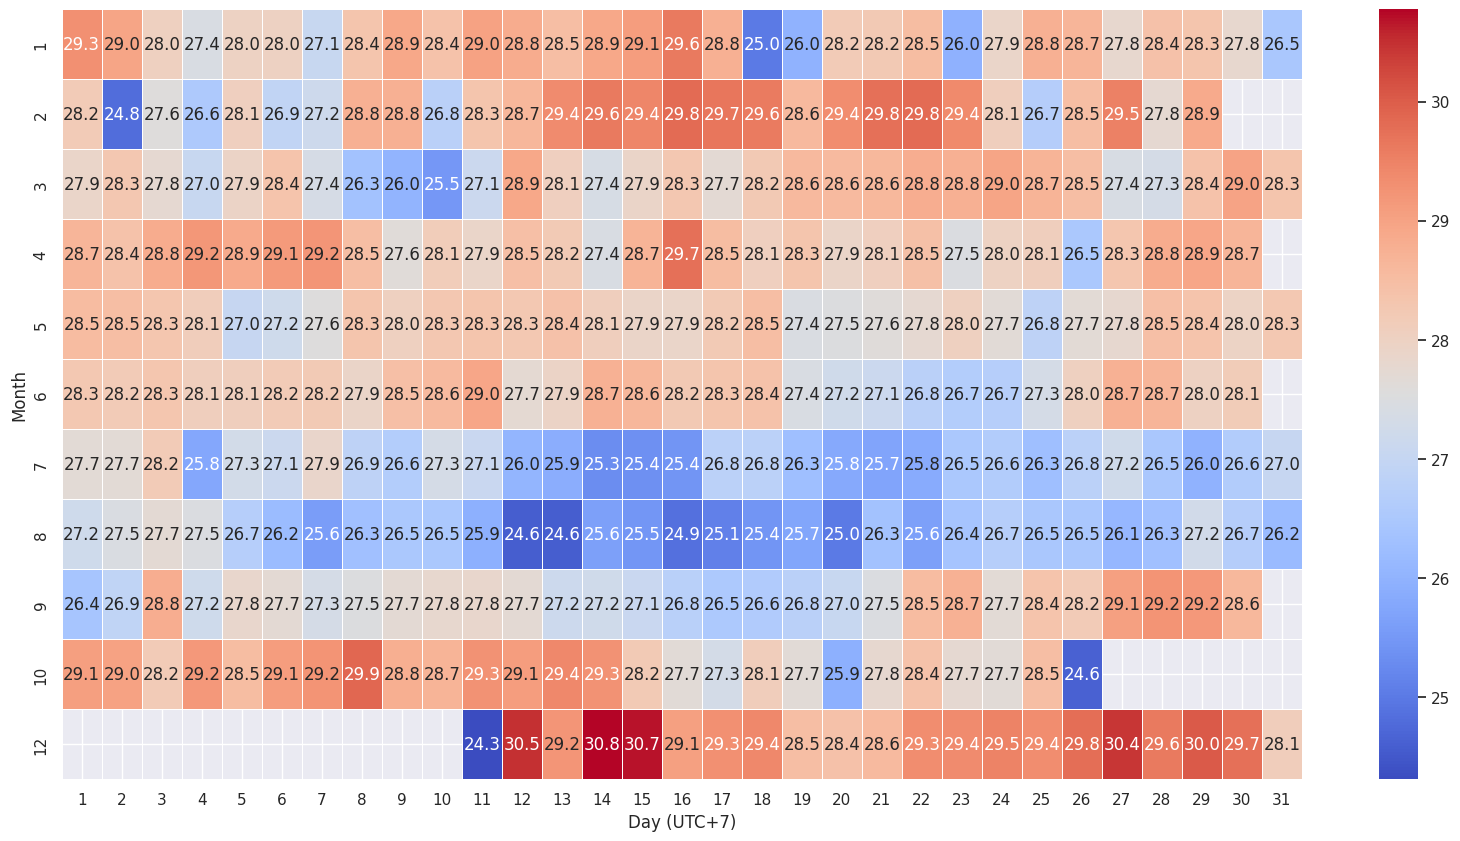

In [16]:
# Mengelompokkan data berdasarkan 'month' dan 'day', menghitung rata-rata suhu
datacuaca_grouped = datacuaca.groupby(['month', 'day']).agg({'temperature': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap (sumbu X: hari, sumbu Y: bulan)
temperature_pivot = datacuaca_grouped.pivot(index='month', columns='day', values='temperature')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(20, 10))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Day (UTC+7)')
ax.set_ylabel('Month')

# Menampilkan heatmap
plt.show()


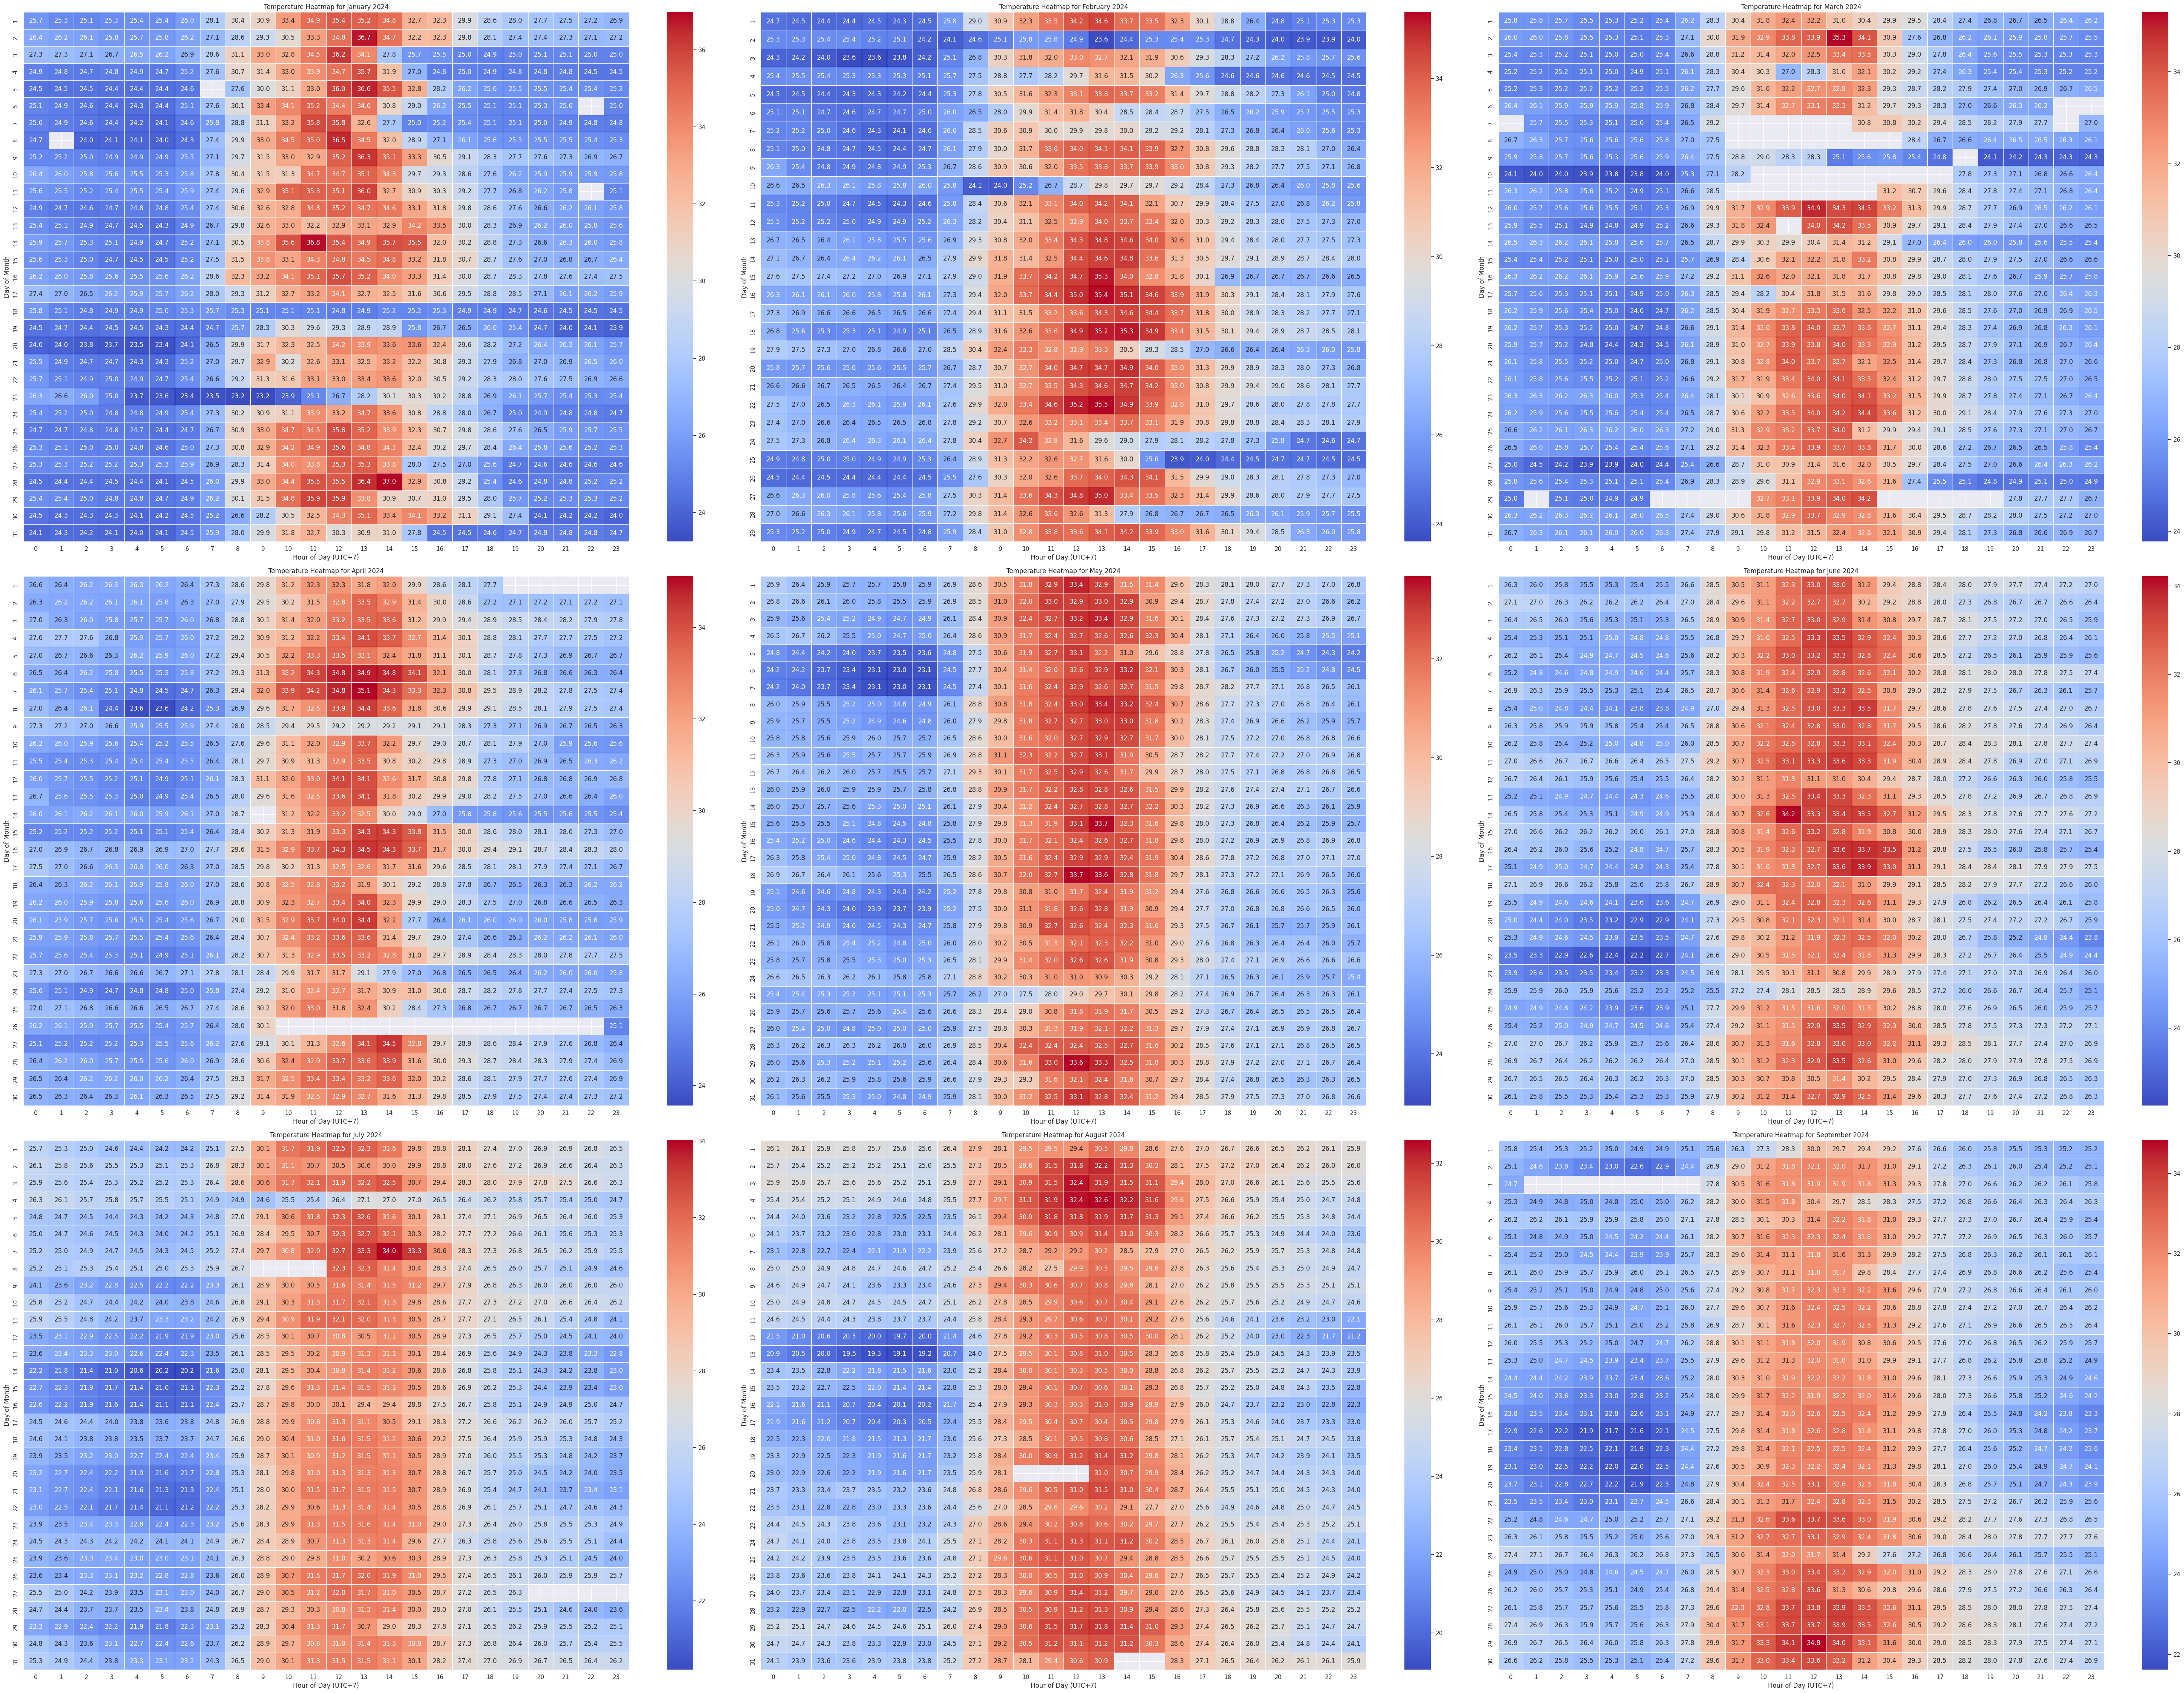

In [17]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']

# Menentukan rentang bulan dari Januari hingga September
months = range(1, 10)  # Bulan 1 hingga 9

# Mengatur ukuran grafik untuk menampung semua heatmap
fig, axs = plt.subplots(3, 3, figsize=(60, 45))
axs = axs.flatten()  # Meratakan array subplot untuk iterasi yang lebih mudah

# Looping untuk setiap bulan
for month in months:
    # Filter data untuk bulan tertentu
    monthly_data = datacuaca[(datacuaca['timestamp'].dt.year == 2024) & (datacuaca['timestamp'].dt.month == month)]

    # Mengurutkan data berdasarkan 'timestamp'
    monthly_data = monthly_data.sort_values(by='timestamp')

    # Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
    monthly_data['day'] = monthly_data['timestamp'].dt.day
    monthly_data['hour'] = monthly_data['timestamp'].dt.hour

    # Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
    datacuaca_grouped = monthly_data.groupby(['day', 'hour']).agg({'temperature': 'mean'}).reset_index()

    # Pivot dataframe untuk membuat format yang sesuai dengan heatmap
    temperature_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='temperature')

    # Membuat heatmap untuk bulan tersebut
    sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=.5, ax=axs[month-1], cmap="coolwarm")
    
    # Memberi judul pada heatmap
    axs[month-1].set_title(f'Temperature Heatmap for {month_names[month-1]} 2024')
    axs[month-1].set_xlabel('Hour of Day (UTC+7)')
    axs[month-1].set_ylabel('Day of Month')

# Mengatur layout
plt.tight_layout()

# Menampilkan heatmaps
plt.savefig("Heatmap_month.jpg")
plt.show()



In [9]:
pilih_tahun = 2024
pilih_bulan = 10

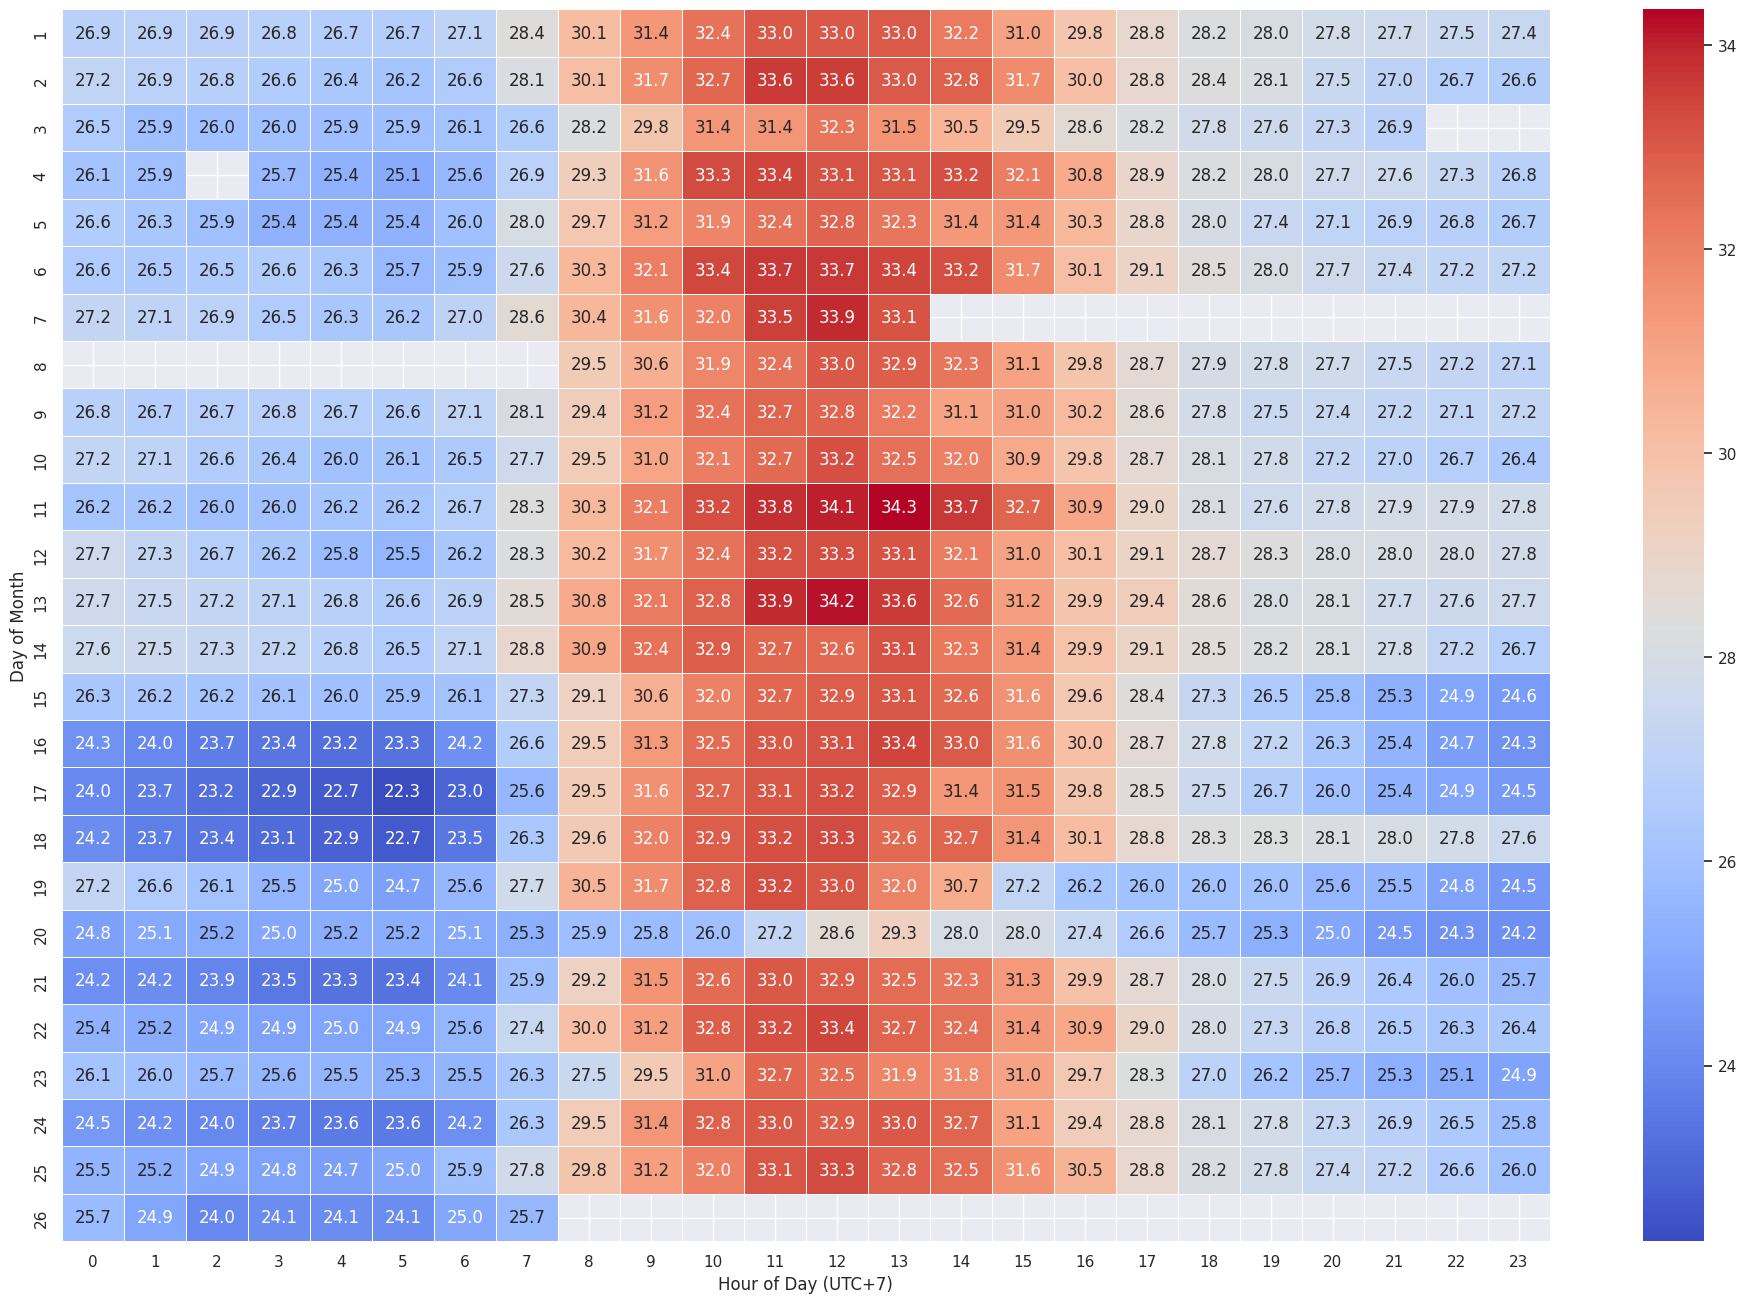

In [18]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'temperature': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
temperature_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='temperature')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap
plt.savefig("Temp_month.jpg")
plt.show()



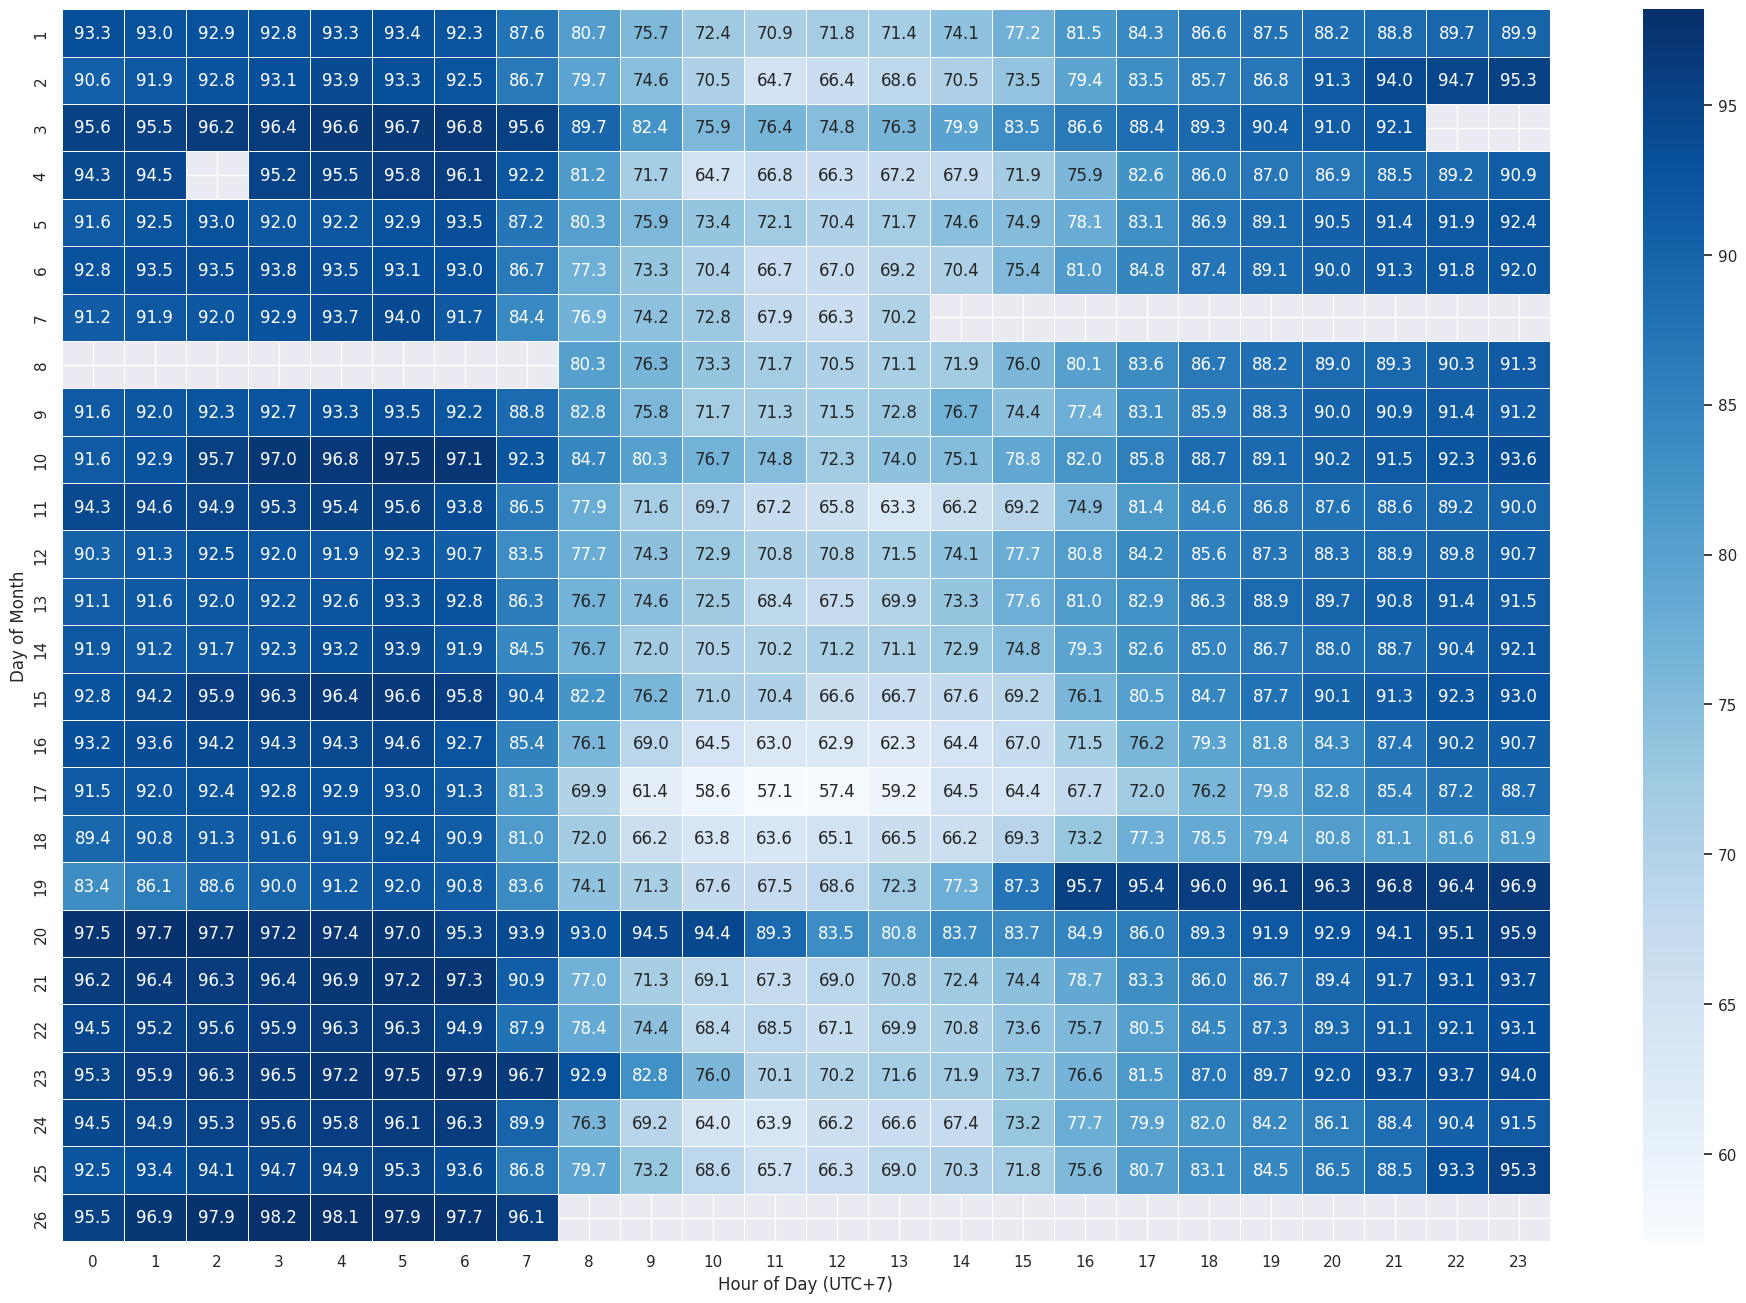

In [19]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'humidity': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
humidity_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='humidity')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(humidity_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="Blues")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap
plt.show()

Text(266.25, 0.5, 'Day of Month')

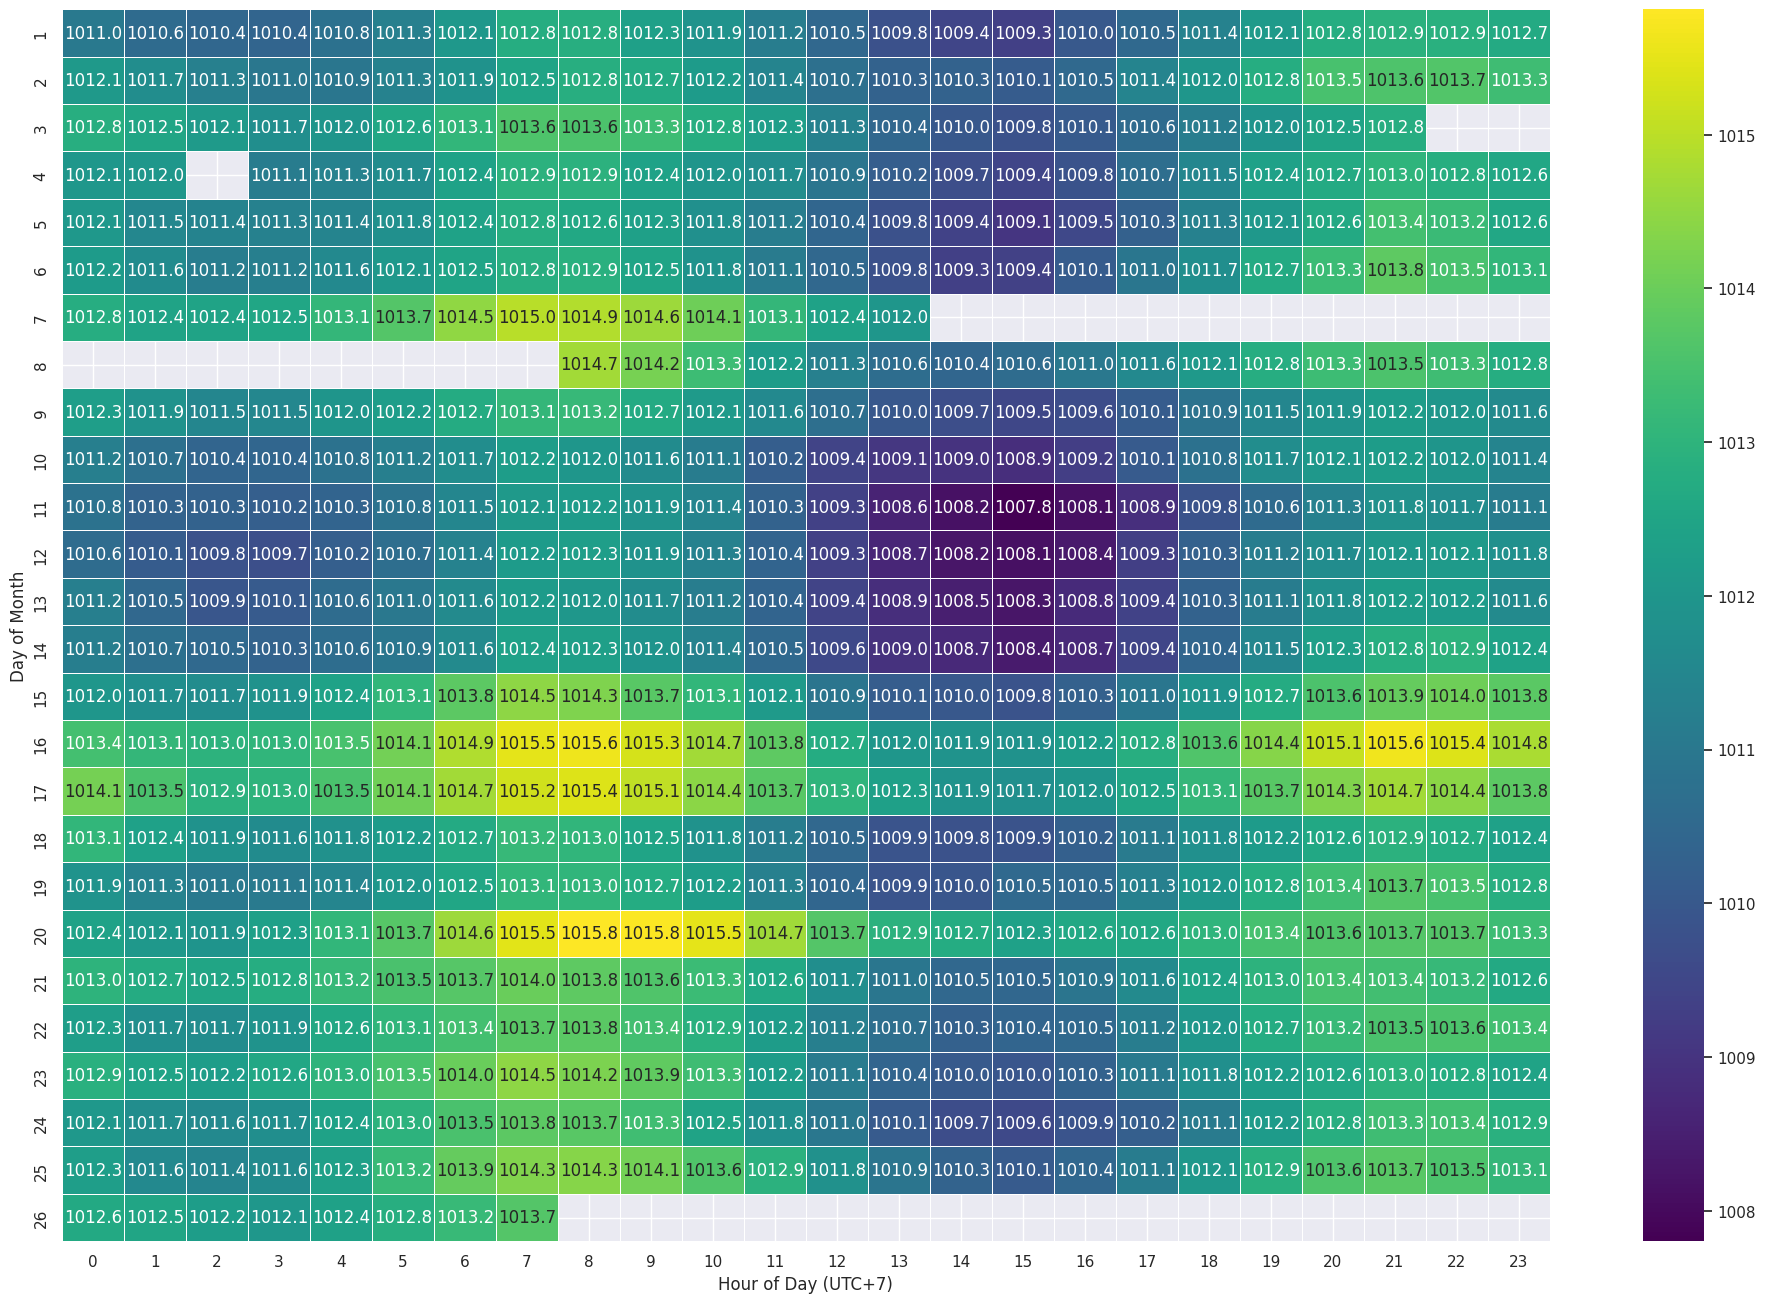

In [20]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'pressure': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
pressure_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='pressure')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(pressure_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="viridis")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=200afad5-8991-4e20-8a55-8751c7aff3b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>